In [1]:
import cv2
import matplotlib.pyplot as plt
import random
import numpy as np
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [3]:
image_path = "/home/norman/Desktop/driving_dataset/1000.jpg"

In [4]:
img = plt.imread(image_path)

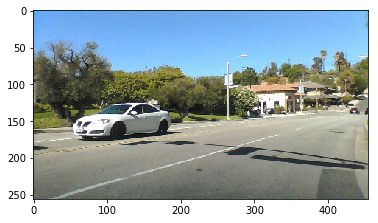

In [5]:
plt.imshow(img)
plt.show()

** Converto immagine in HSV (hue saturation value) per poter modificare facimente la luminosità**

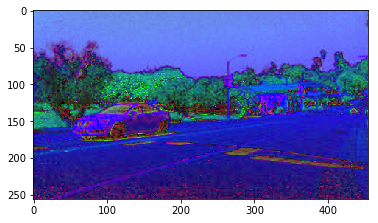

In [5]:
hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(hsv)
plt.show()

Modifico la luminosità moltiplicando il terzo canale di value
https://stackoverflow.com/questions/32609098/how-to-fast-change-image-brightness-with-python-opencv

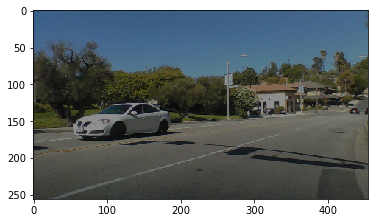

In [6]:
rand = random.uniform(0.3,1.6)
hsv[:,:,2] = rand*hsv[:,:,2]
new_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
plt.imshow(new_img)
plt.show()

Taglio via parti del cielo che non ci interessano
https://stackoverflow.com/questions/15589517/how-to-crop-an-image-in-opencv-using-python

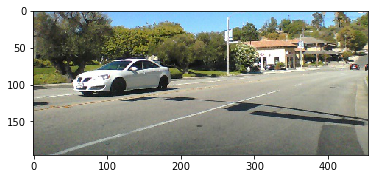

In [7]:
crop_img = img[60::, ::]
plt.imshow(crop_img)
plt.show()

Scrivo le funzioni di sopra come effettive funzioni

In [6]:
def change_bright(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    
    rand = random.uniform(0.5,1.)
    hsv[:,:,2] = rand*hsv[:,:,2]
    new_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
   # plt.imshow(new_img)
   # plt.show()
    return new_img

In [7]:
change_bright(img)

array([[[ 71, 145, 219],
        [ 73, 145, 217],
        [ 79, 160, 222],
        ..., 
        [115, 172, 196],
        [113, 164, 193],
        [112, 158, 198]],

       [[ 69, 142, 216],
        [ 81, 158, 226],
        [ 79, 160, 222],
        ..., 
        [121, 178, 207],
        [108, 161, 196],
        [111, 165, 206]],

       [[ 74, 146, 219],
        [ 82, 153, 224],
        [ 81, 156, 221],
        ..., 
        [123, 179, 221],
        [105, 161, 203],
        [109, 167, 212]],

       ..., 
       [[ 81,  88,  80],
        [ 86,  91,  85],
        [ 90,  92,  91],
        ..., 
        [119, 123, 109],
        [117, 124, 107],
        [120, 127, 110]],

       [[ 76,  89,  90],
        [ 79,  90,  88],
        [ 82,  91,  84],
        ..., 
        [117, 121, 108],
        [115, 121, 108],
        [120, 126, 111]],

       [[ 78,  91,  98],
        [ 78,  91,  91],
        [ 84,  93,  85],
        ..., 
        [114, 117, 109],
        [113, 119, 108],
        [118, 124,

In [8]:
def crop_sky(img):
    #120*320
    #196*455 sulle reali
    crop_img = img[60::, ::]
   # plt.imshow(crop_img)
   # plt.show()
    return crop_img


In [9]:
crop_sky(img)

array([[[130, 143, 133],
        [121, 136, 143],
        [113, 129, 145],
        ..., 
        [159, 223, 248],
        [157, 219, 242],
        [164, 222, 246]],

       [[115, 134, 128],
        [123, 134, 136],
        [121, 130, 137],
        ..., 
        [156, 203, 213],
        [171, 216, 222],
        [177, 218, 224]],

       [[122, 140, 152],
        [117, 130, 138],
        [132, 142, 144],
        ..., 
        [216, 235, 239],
        [206, 225, 223],
        [208, 223, 218]],

       ..., 
       [[ 87,  94,  86],
        [ 93,  98,  92],
        [ 97,  99,  98],
        ..., 
        [128, 132, 117],
        [126, 133, 115],
        [129, 136, 118]],

       [[ 82,  96,  97],
        [ 85,  97,  95],
        [ 88,  98,  90],
        ..., 
        [126, 130, 116],
        [124, 130, 116],
        [128, 135, 119]],

       [[ 84,  97, 105],
        [ 84,  98,  98],
        [ 90, 100,  92],
        ..., 
        [122, 125, 116],
        [122, 128, 116],
        [127, 133,

## Per il dataset carico come X i path delle immagini e come y gli angoli di steering.


In [10]:
data_path="/home/norman/Desktop/driving_dataset/data.txt"

Retrieve paths of images

In [11]:
img_paths=[]
steers=[]
with open(data_path) as file:
    for line in file:
        if line.split(',')[0] == "center": continue
        img_paths.append("/home/norman/Desktop/driving_dataset/" + line.split(' ')[0])
        steers.append(line.split(' ')[1].strip())

In [12]:
img_paths, img_valid, steers, steers_valid = train_test_split(img_paths, steers, test_size = 0.10, random_state = 100) 

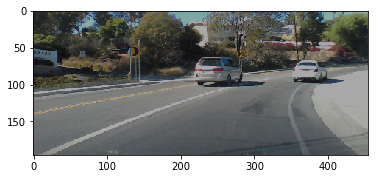

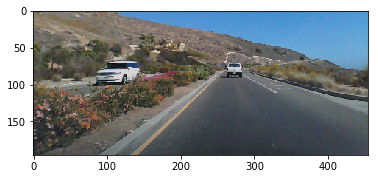

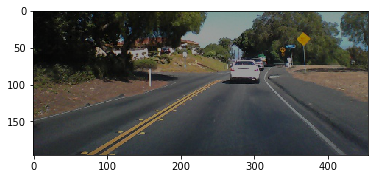

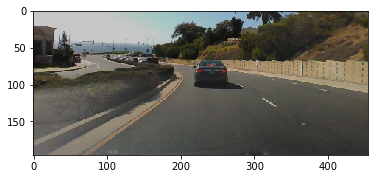

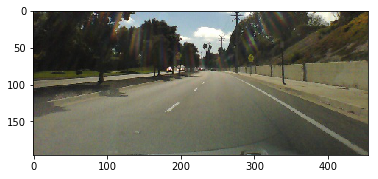

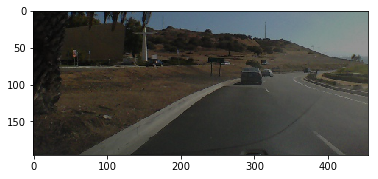

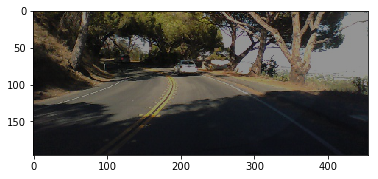

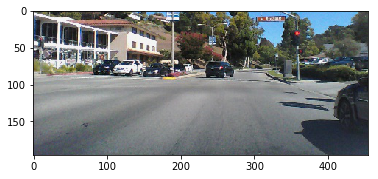

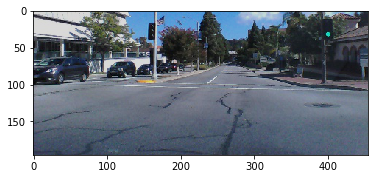

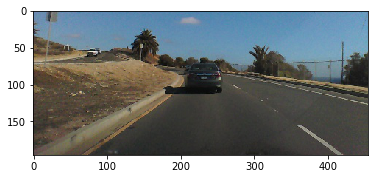

In [13]:
for i in range(10):
    img=plt.imread(img_paths[i])
    new=crop_sky(change_bright(img))
    plt.imshow(new)
    plt.show()

In [14]:
def gen_batch(batch_size):
    batch_x=np.zeros((batch_size,196,455,3))
    batch_y=np.zeros((batch_size,1))
    pointer=0
    (im_paths, steerss)=shuffle(img_paths, steers)
    while True:
        for i in range(batch_size):
            img=plt.imread(im_paths[pointer])
            steer=steerss[pointer]
            new_img=crop_sky(change_bright(img))
            
            batch_x[i]=new_img
            batch_y[i]=steer
            pointer+=1
            if pointer==len(im_paths)-1: pointer=0
        
        yield batch_x, batch_y

In [15]:
def gen_val_batch(batch_size):
    batch_x=np.zeros((batch_size,196,455,3))
    batch_y=np.zeros((batch_size,1))
    pointer=0
    (im_valid, steer_valid)=shuffle(img_valid, steers_valid)
    while True:
        for i in range(batch_size):
            img=plt.imread(im_valid[pointer])
            steer=steer_valid[pointer]
            new_img=crop_sky(change_bright(img))
            
            batch_x[i]=new_img
            batch_y[i]=steer
            pointer+=1
            if pointer==len(im_valid)-1: pointer=0
        
        yield batch_x, batch_y

In [17]:
b_x=generator(5)

NameError: name 'generator' is not defined

In [18]:
for batch in b_x:
    for new_img in batch[0]:
        plt.imshow(new_img)


NameError: name 'b_x' is not defined

In [16]:
import matplotlib.image as mpimg
import numpy as np
import cv2
import pandas
import random
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Activation, Flatten, Dropout, Lambda, ELU, concatenate, GlobalAveragePooling2D, Input
from keras.activations import relu, softmax
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.optimizers import Adam
from keras.regularizers import l2
import math

Using TensorFlow backend.


In [17]:
generator=gen_batch(16)
input_shape = (196,455,3)
model = Sequential()
model.add(Lambda(lambda x: x/255 - 0.5, input_shape = input_shape))
model.add(Convolution2D(24, (5, 5), padding='valid', strides =(2,2), kernel_regularizer = l2(0.001)))
model.add(Activation('relu'))
model.add(Convolution2D(36, (5, 5), padding='valid', strides =(2,2), kernel_regularizer = l2(0.001)))
model.add(Activation('relu'))
model.add(Convolution2D(48, (5, 5), padding='valid', strides = (2,2), kernel_regularizer = l2(0.001)))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3), padding='same', strides = (2,2), kernel_regularizer = l2(0.001)))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3), padding='valid', strides = (2,2), kernel_regularizer = l2(0.001)))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(80, kernel_regularizer = l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(40, kernel_regularizer = l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(16, kernel_regularizer = l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(10, kernel_regularizer = l2(0.001)))
model.add(Dense(1, kernel_regularizer = l2(0.001)))
adam = Adam(lr = 0.0001)
model.compile(optimizer= adam, loss='mse')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 196, 455, 3)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 226, 24)       1824      
_________________________________________________________________
activation_1 (Activation)    (None, 96, 226, 24)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 111, 36)       21636     
_________________________________________________________________
activation_2 (Activation)    (None, 46, 111, 36)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 54, 48)        43248     
_________________________________________________________________
activation_3 (Activation)    (None, 21, 54, 48)        0         
__________

In [16]:
model.fit_generator(generator, samples_per_epoch = int(len(img_paths)/16-10), nb_epoch=10)

/home/norman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  """Entry point for launching an IPython kernel.
/home/norman/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<generator..., steps_per_epoch=2827, epochs=10)`
  """Entry point for launching an IPython kernel.


Epoch 1/10
   5/2827 [..............................] - ETA: 5365s - loss: 846.9035 - acc: 0.0375

KeyboardInterrupt: 

In [18]:
generator=gen_batch(4)
val_gen=gen_val_batch(4)
input_shape = (196,455,3)

In [19]:
def fire(x, squeeze=16, expand=64):
    x = Convolution2D(squeeze, (1,1), padding='valid')(x)
    x = Activation('relu')(x)
    
    left = Convolution2D(expand, (1,1), padding='valid')(x)
    left = Activation('relu')(left)
    
    right = Convolution2D(expand, (3,3), padding='same')(x)
    right = Activation('relu')(right)
    
    x = concatenate([left, right], axis=3)
    return x

In [43]:
img_input=Input(shape=input_shape)
x = Convolution2D(64, (3, 3), strides=(2, 2), padding='valid')(img_input)
x = fire(x, squeeze=64, expand=256)

x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(20, 20), strides=(20, 20))(x)
x = Flatten()(x)
x = Dense(1)(x)
out = Activation('linear')(x)
modelsqueeze= Model(img_input, out)

In [20]:
img_input=Input(shape=input_shape)

x = Convolution2D(64, (3, 3), strides=(2, 2), padding='valid')(img_input)
x = Activation('relu')(x)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

x = fire(x, squeeze=16, expand=16)
x = fire(x, squeeze=16, expand=16)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

x = fire(x, squeeze=32, expand=32)
x = fire(x, squeeze=32, expand=32)
x = MaxPooling2D(pool_size=(3, 3), strides=(2, 2))(x)

x = fire(x, squeeze=48, expand=48)
x = fire(x, squeeze=48, expand=48)
x = fire(x, squeeze=64, expand=64)
x = fire(x, squeeze=64, expand=64)
x = Dropout(0.5)(x)

x = Convolution2D(5, (1, 1), padding='valid')(x) #forse pochi 5
x = Activation('relu')(x)
x = Flatten()(x)
#x = GlobalAveragePooling2D()(x)

x = Dense(1)(x)
out = Activation('linear')(x)

modelsqueeze= Model(img_input, out)

In [104]:
adam = Adam(lr = 0.0001)
modelsqueeze.compile(optimizer= adam, loss='mse', metrics=['accuracy'])
modelsqueeze.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_20 (InputLayer)            (None, 196, 455, 3)   0                                            
____________________________________________________________________________________________________
conv2d_332 (Conv2D)              (None, 97, 227, 64)   1792        input_20[0][0]                   
____________________________________________________________________________________________________
activation_349 (Activation)      (None, 97, 227, 64)   0           conv2d_332[0][0]                 
____________________________________________________________________________________________________
max_pooling2d_43 (MaxPooling2D)  (None, 48, 113, 64)   0           activation_349[0][0]             
___________________________________________________________________________________________

In [106]:
history= modelsqueeze.fit_generator(generator, steps_per_epoch = int(len(img_paths)/4-10), epochs=10, validation_data=val_gen, validation_steps = 50)

Epoch 1/10
10206/10206 [==============================] - 3907s - loss: 707.4264 - acc: 0.0034 - val_loss: 487.1422 - val_acc: 0.0000e+00
Epoch 2/10
10206/10206 [==============================] - 3926s - loss: 573.7534 - acc: 0.0023 - val_loss: 295.5517 - val_acc: 0.0000e+00
Epoch 3/10
10206/10206 [==============================] - 3923s - loss: 482.9519 - acc: 0.0023 - val_loss: 361.3037 - val_acc: 0.0000e+00
Epoch 4/10
10206/10206 [==============================] - 3930s - loss: 463.8468 - acc: 0.0019 - val_loss: 196.0613 - val_acc: 0.0000e+00
Epoch 5/10
10206/10206 [==============================] - 3959s - loss: 374.0279 - acc: 0.0022 - val_loss: 279.2711 - val_acc: 0.0050
Epoch 6/10
10206/10206 [==============================] - 3984s - loss: 303.6079 - acc: 0.0021 - val_loss: 242.1684 - val_acc: 0.0000e+00
Epoch 7/10
10206/10206 [==============================] - 3961s - loss: 247.5697 - acc: 0.0031 - val_loss: 247.8555 - val_acc: 0.0000e+00
Epoch 8/10
10206/10206 [==============

KeyboardInterrupt: 

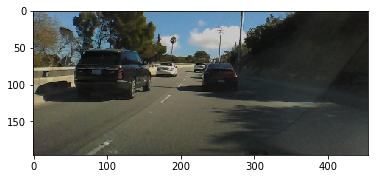

'-15.430000'

In [40]:
new_img=crop_sky(change_bright(plt.imread(img_paths[6101])))
plt.imshow(new_img)
plt.show()
steers[6101]

In [42]:
model.predict(np.array([new_img]))

array([[-20.9227562]], dtype=float32)

In [65]:
modelsqueeze.evaluate_generator(val_gen,steps=100)

[1142.6150645494461, 0.0]

In [ ]:
modelsqueeze.save('squeeze.h5')

In [38]:
# save model

print('Saving model...')

model_json = modelsqueeze.to_json()
with open("modelsqueeze.json", "w") as json_file:
    json_file.write(model_json)

modelsqueeze.save_weights("modelsqueeze.h5")
print("Model Saved.")

Saving model...
Model Saved.


In [32]:
#modelsqueeze.load_weights("modelsqueeze.h5")
from keras.models import model_from_json
import json
#model = model_from_json(json_string)
json_data=open("modelnvidia.json", "r").read()
#print(json_data)

    
model = model_from_json(json_data)
model.load_weights("modelnvidia.h5")
model.compile(optimizer= adam, loss='mse')


In [33]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_4 (Lambda)            (None, 196, 455, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 96, 226, 24)       1824      
_________________________________________________________________
activation_6 (Activation)    (None, 96, 226, 24)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 46, 111, 36)       21636     
_________________________________________________________________
activation_7 (Activation)    (None, 46, 111, 36)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 21, 54, 48)        43248     
_________________________________________________________________
activation_8 (Activation)    (None, 21, 54, 48)        0         
__________

In [29]:
model.load_weights("modelsqueeze.h5")
model.compile(optimizer= adam, loss='mse')


In [34]:
model.evaluate_generator(val_gen,steps=100)

125.33243351221084